In [16]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 1A. shape of data
df.shape

(1338, 7)

In [5]:
# 1B. data type of each attribute
# 1C. checking the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 1D. 5 points summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'charges Distribution')

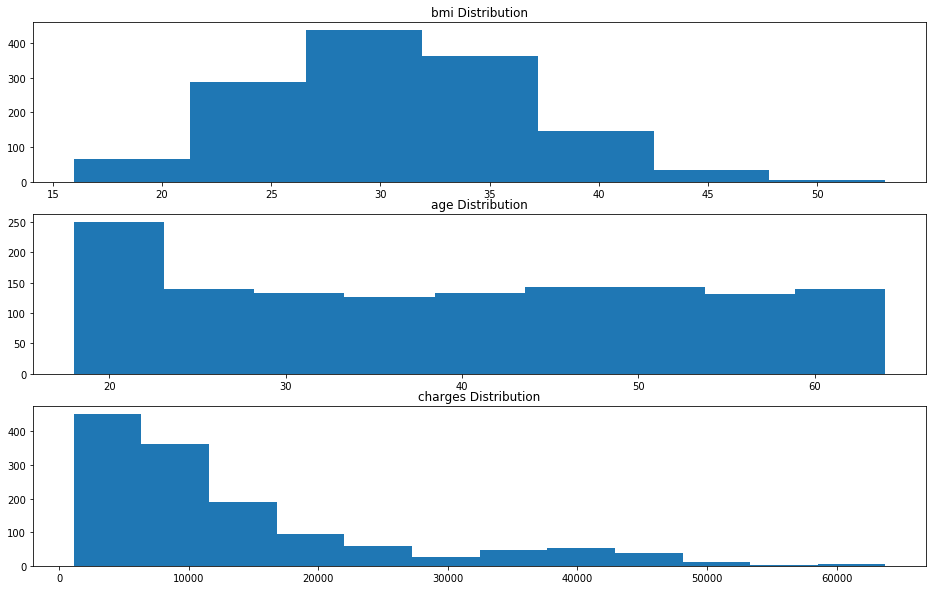

In [7]:
# 1E. distribution of 'bmi', 'age' and 'charges' columns

#bins
bmi_bin = int((df.bmi.max()-df.bmi.min())/5)
age_bin = int((df.age.max()-df.age.min())/5)
charges_bin = int((df.charges.max()-df.charges.min())/5000)

#plot histograms
fig, axs = plt.subplots(3, figsize=(16,10)) #3x1 subplots

axs[0].hist(df.bmi, bins=bmi_bin)
axs[0].set_title('bmi Distribution')

axs[1].hist(df.age, bins=age_bin)
axs[1].set_title('age Distribution')

axs[2].hist(df.charges, bins=charges_bin)
axs[2].set_title('charges Distribution')

In [8]:
# 1F. the measure of skewness of 'bmi', 'age', and 'charges' columns
df.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Text(0.5, 1.0, 'charges Boxplot')

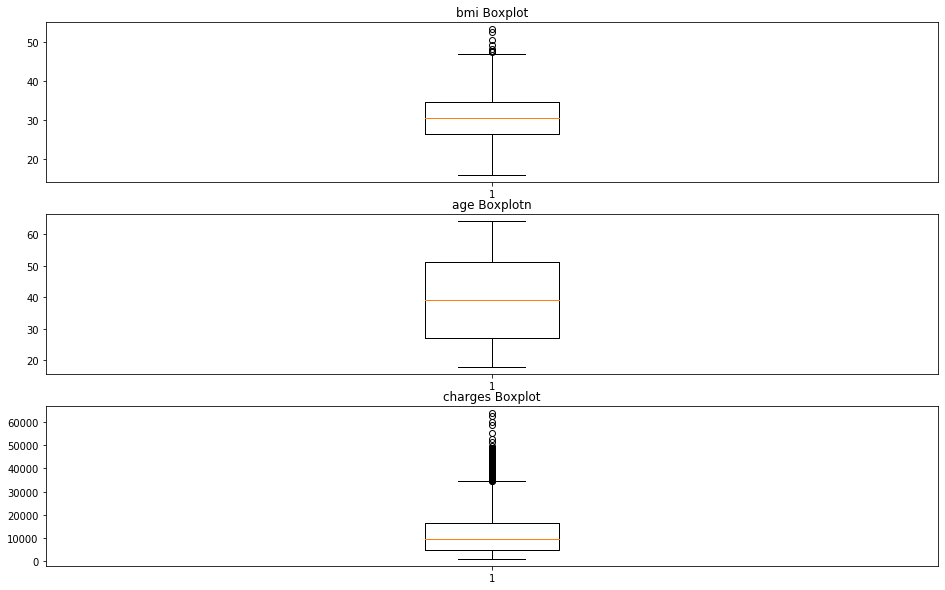

In [9]:
# 1G. checking the presence of outliers in 'bmi', 'age' and 'charges' columns

#plot boxplots
fig, axs = plt.subplots(3, figsize=(16,10)) #3x1 subplots

axs[0].boxplot(df.bmi)
axs[0].set_title('bmi Boxplot')

axs[1].boxplot(df.age)
axs[1].set_title('age Boxplotn')

axs[2].boxplot(df.charges)
axs[2].set_title('charges Boxplot')

In [10]:
# Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)
# H0: mean_smoke = mean_non

#differentiate data between smoker and non-smoker
df_smoke = df[df['smoker']=='yes']
df_non = df[df['smoker']=='no']

#number of entries
n_smoke = df_smoke.shape[0]
n_non = df_non.shape[0]

#calculate charges means and standard deviations
mean_smoke = df_smoke['charges'].mean()
mean_non = df_non['charges'].mean()

std_smoke = df_smoke['charges'].std()
std_non = df_non['charges'].std()

In [11]:
print('n smoke: {}, n non: {}, mean smoke: {}, mean non: {}, std smoke: {}, std non: {}'.format(n_smoke, n_non, mean_smoke, mean_non, std_smoke, std_non))

n smoke: 274, n non: 1064, mean smoke: 32050.23183153285, mean non: 8434.268297856199, std smoke: 11541.547175589121, std non: 5993.781819194933


In [19]:
#t test using scipy
ttest,pval = ttest_ind(df_smoke['charges'],df_non['charges'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 8.271435842177219e-283
we reject null hypothesis
